In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")




In [3]:
data =pd.read_csv("Dots Customer Survey.csv")
data.head()

,Unique ID,Country,Age,Annual Family Income ($),Gender,Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
0,7319483,CAN,13,20423,Male,3,4,3,7,8,...,1,4,0,1,0,0,0,0,0,1
1,4791965,CAN,13,5570,Female,3,3,1,10,3,...,1,6,0,1,0,0,0,0,1,1
2,2991718,CAN,13,58706,Female,2,2,1,4,9,...,0,5,0,0,0,0,0,0,0,0
3,4220106,CAN,13,57118,Male,6,2,4,10,11,...,1,9,0,1,0,0,0,0,0,0
4,2263008,CAN,14,59834,Male,6,3,4,13,12,...,1,6,1,0,0,0,0,0,0,0


Identifying and handling missing values

In [4]:
#Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

Unique ID                                                  0
Country                                                    0
Age                                                        0
Annual Family Income ($)                                   0
Gender                                                     0
Time spent watching videos/TV                              0
Time spent playing indoor sports                           0
Time spent playing outdoor sports                          0
Total Time spent working in front of screen                0
Sleeping hours                                             0
IQ                                                         0
Whether parents have specs                                 0
English speaker                                            0
Migrated within country                                    0
Migrated overseas                                          0
Maritial Status (0 - Single, 1 - Married, 2 - Divorced)    0
Has Diabetes            

In [5]:
#Handling missing values
data['Annual Family Income ($)'] = data['Annual Family Income ($)'].fillna(data['Annual Family Income ($)'].mean())


In [6]:
#Handling categorical varables
data['Education Status'].fillna(data['Education Status'].mode()[0])

,Education Status
0,Studying
1,Studying
2,Studying
3,Studying
4,Studying
...,...
3215,Dropout
3216,Graduate
3217,Dropout
3218,Dropout


Identifying Outliers

In [7]:
Q1 = data['Annual Family Income ($)'].quantile(0.25)
Q3 = data['Annual Family Income ($)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filtering outliers
outliers = data[(data['Annual Family Income ($)'] < lower_bound) | (data['Annual Family Income ($)'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [Unique ID, Country, Age, Annual Family Income ($), Gender, Time spent watching videos/TV, Time spent playing indoor sports, Time spent playing outdoor sports, Total Time spent working in front of screen, Sleeping hours, IQ, Whether parents have specs, English speaker, Migrated within country, Migrated overseas, Maritial Status (0 - Single, 1 - Married, 2 - Divorced), Has Diabetes, Education Status, Has Gym Subscription, Has OTT subscription, Number of friends, Likes spicy food, Likes desserts, Wants to change career, Has debt, Has kids, Drinks alcohol, Smoker, Wear Specs]
Index: []

[0 rows x 29 columns]


Exploring Data characteristics

In [8]:
#Displaying data types and non_null counts
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 29 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Unique ID                                                3220 non-null   int64 
 1   Country                                                  3220 non-null   object
 2   Age                                                      3220 non-null   int64 
 3   Annual Family Income ($)                                 3220 non-null   int64 
 4   Gender                                                   3220 non-null   object
 5   Time spent watching videos/TV                            3220 non-null   int64 
 6   Time spent playing indoor sports                         3220 non-null   int64 
 7   Time spent playing outdoor sports                        3220 non-null   int64 
 8   Total Time spent working in front of s

In [9]:
#Summarizing statistics of numerical columns
print(data.describe)

<bound method NDFrame.describe of       Unique ID Country  Age  Annual Family Income ($)  Gender  \
0       7319483     CAN   13                     20423    Male   
1       4791965     CAN   13                      5570  Female   
2       2991718     CAN   13                     58706  Female   
3       4220106     CAN   13                     57118    Male   
4       2263008     CAN   14                     59834    Male   
...         ...     ...  ...                       ...     ...   
3215    4936093     KOR   78                     15861  Female   
3216    3458615     KOR   78                     24510    Male   
3217    7651095     KOR   78                      6716    Male   
3218    7490009     KOR   78                     37569    Male   
3219    9367449     KOR   78                     17534    Male   

      Time spent watching videos/TV  Time spent playing indoor sports  \
0                                 3                                 4   
1                          

In [11]:
#Checking unique values for categorial columns
print(data['Gender'].unique())
print(data['Education Status'].unique())

['Male' 'Female']
['Studying' 'Dropout' 'Graduate']


Analyzing Feature Distribution and Relationships with Target variables

<function matplotlib.pyplot.show(close=None, block=None)>

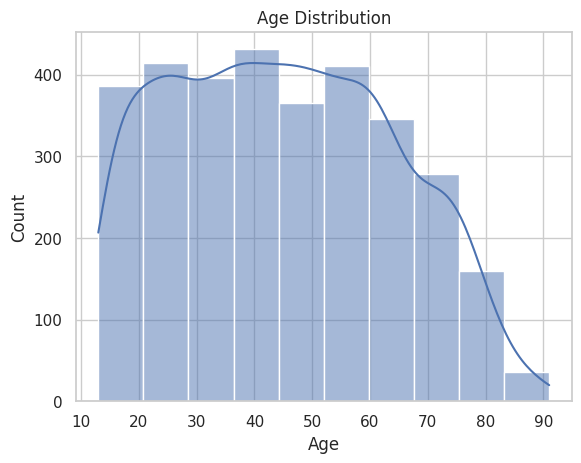

In [12]:
#Distribution of 'Age'
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show

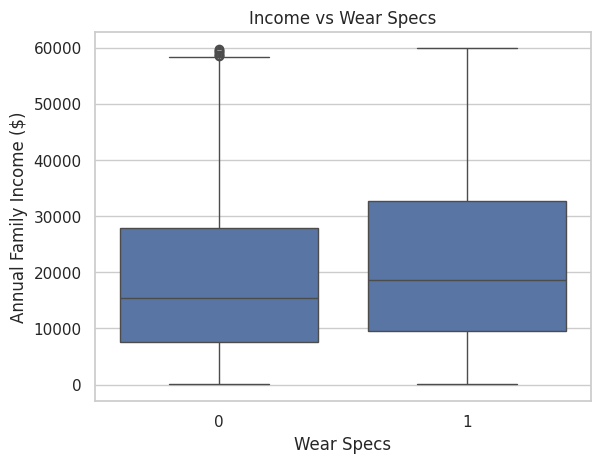

In [13]:
#Relationship between 'Annual Family Income' and 'Wear Specs'
sns.boxplot(x='Wear Specs', y='Annual Family Income ($)', data=data)
plt.title('Income vs Wear Specs')
plt.show()